![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
18776,id_6479,Madrid,NaN,6482.0,NaN,8.0,"[['A must for crisps and nuts fanatics', 'REAL...",/Restaurant_Review-g187514-d9862424-Reviews-He...,d9862424,1,4.0
8537,id_8537,Ljubljana,NaN,292.0,NaN,6.0,"[['Good sweets', 'Come for the cake'], ['10/03...",/Restaurant_Review-g274873-d8512510-Reviews-To...,d8512510,0,0.0
47268,id_4520,Milan,NaN,4523.0,NaN,NaN,"[[], []]",/Restaurant_Review-g187849-d7706932-Reviews-F_...,d7706932,1,4.0
3498,id_3498,Milan,"['Italian', 'Mediterranean', 'European', 'Wine...",2077.0,$$ - $$$,158.0,"[['Exellent for small plates with wine', 'Exce...",/Restaurant_Review-g187849-d3345786-Reviews-La...,d3345786,0,0.0
46284,id_1680,Stockholm,NaN,1683.0,NaN,2.0,"[['Cheap eats in the middle of Stockholm'], ['...",/Restaurant_Review-g189852-d11793908-Reviews-M...,d11793908,1,4.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [17]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [18]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na


In [19]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0


In [20]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN
42387,id_1545,Lyon,NaN,1546.0,NaN,13.0,"[['A delicious first meal in Lyon'], ['12/21/2...",/Restaurant_Review-g187265-d5981654-Reviews-Vi...,d5981654,1,4.5,0
15299,id_3125,Vienna,NaN,3127.0,NaN,4.0,"[['A taste of Dominican Republic', 'Watch your...",/Restaurant_Review-g190454-d3185913-Reviews-Sa...,d3185913,1,3.5,0
49697,id_3546,Rome,"['Italian', 'Bar', 'Cafe', 'Mediterranean', 'V...",3547.0,$$ - $$$,602.0,[['excellent introduction to Italian Gelato a....,/Restaurant_Review-g187791-d1531937-Reviews-An...,d1531937,1,3.5,0
49785,id_3223,Rome,"['Italian', 'Mediterranean', 'European', 'Brew...",3224.0,$,38.0,"[['tasty italian sandwitches', 'eat me roam sa...",/Restaurant_Review-g187791-d8778020-Reviews-Ea...,d8778020,1,5.0,0
48806,id_24,Brussels,"['French', 'Belgian', 'European']",25.0,$$ - $$$,524.0,"[['Dinner', 'Incredible!'], ['02/23/2018', '02...",/Restaurant_Review-g188644-d5583550-Reviews-Ch...,d5583550,1,4.5,0


#### Возьмем следующий признак "Price Range".

In [21]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [22]:
# Ваша обработка 'Price Range'

# в блоке предобработки

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

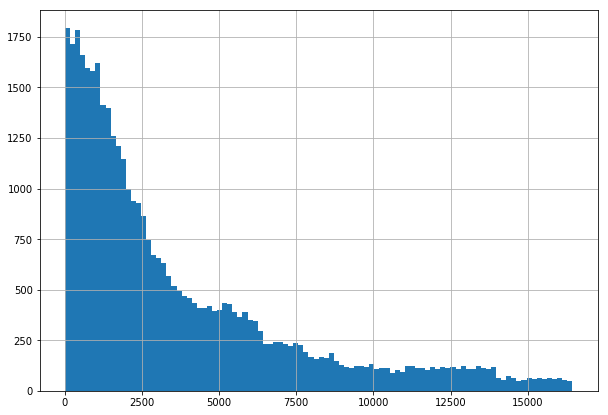

In [23]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

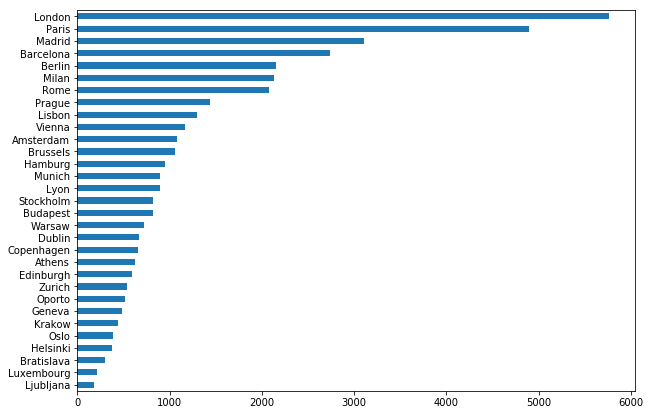

In [24]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

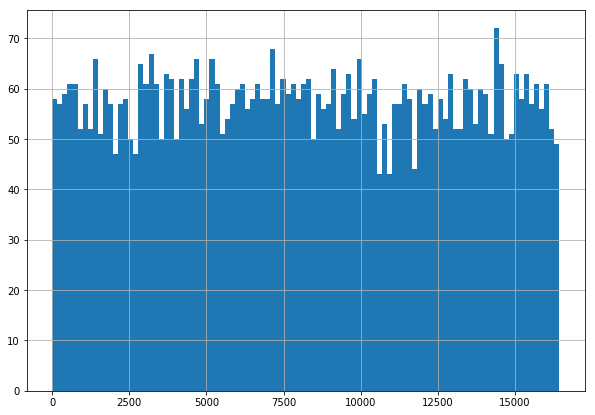

In [25]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

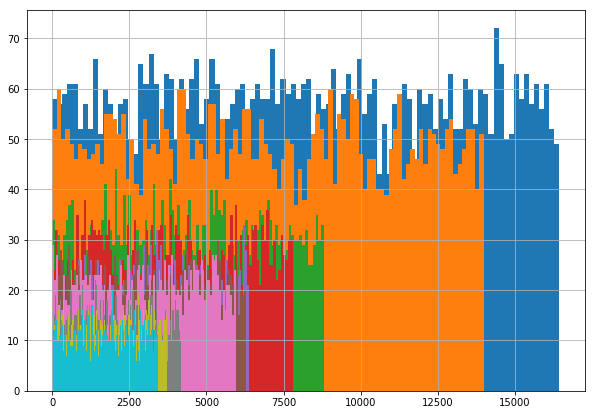

In [26]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

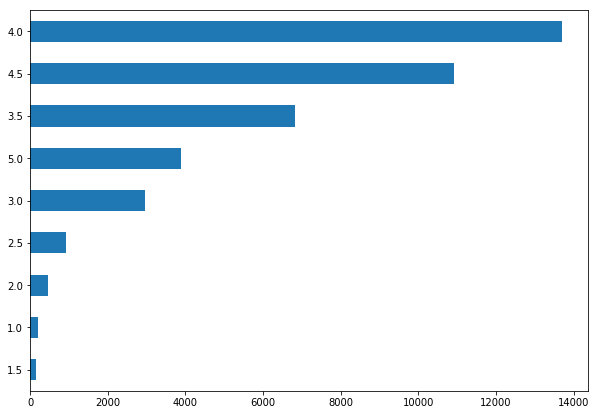

In [27]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

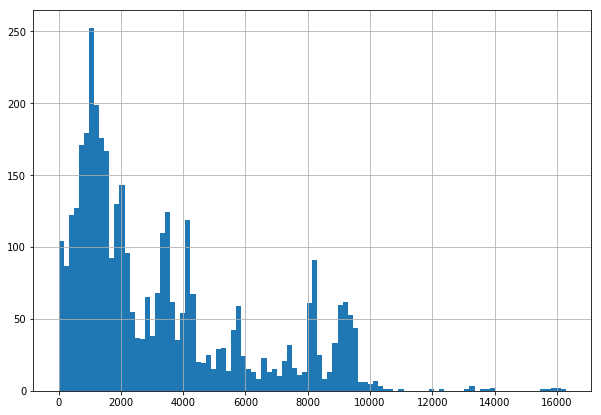

In [28]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

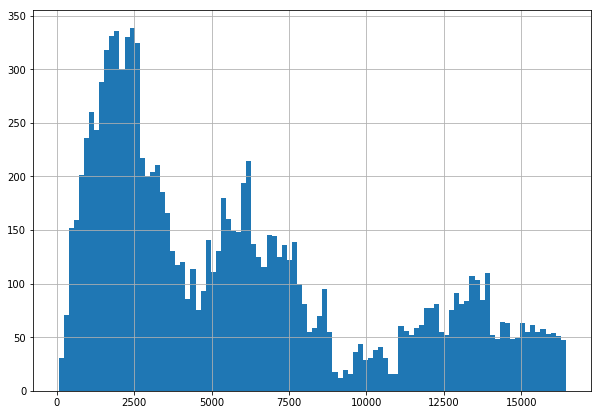

In [29]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

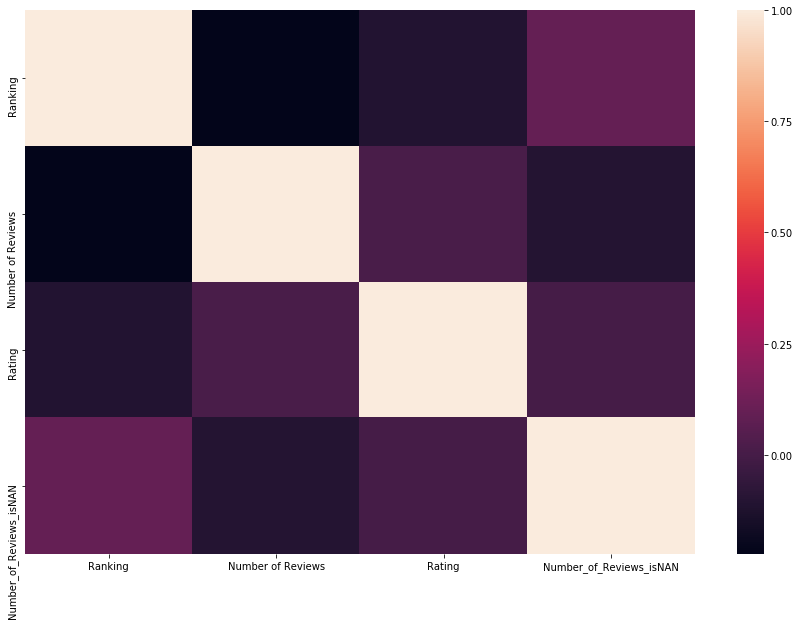

In [30]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [31]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0


# Price Range

In [32]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [33]:
data['Price Range'] = data['Price Range'].replace('$', 1)
data['Price Range'] = data['Price Range'].replace('$$ - $$$', 2)
data['Price Range'] = data['Price Range'].replace('$$$$', 3)

data['Price RangeNAN'] = pd.isna(data['Price Range']).astype('uint8')

#заполним пропуски модой
data['Price Range'] = data['Price Range'].fillna(2)



# Restaurant_id

In [34]:
#добавлена разбивка по сети

# URL_TA

In [35]:
#идей нет

# ID_TA

In [36]:
#идей нет

# Number of Reviews

In [37]:
#отметка
data['Number of ReviewseNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

# пропуски в отзывах это 0 отзывов, заполняем...
data['Number of Reviews'].fillna(0, inplace=True)

# Reviews

In [38]:
#пропуски
data['Reviews'].fillna('[[], []]', inplace=True)

In [39]:
data['Reviews'] = data['Reviews'].fillna('[[], []]')
data['Reviews'] = data['Reviews'].str.replace(r'\[\[\], \[\]\]','None')

s = data['Reviews'].str.split(r"'\], \['",expand=True)
s.columns = ['comments','dates']
s1 = s['comments'].str.split(r"', '",expand=True)
s1.columns = ['comment1','comment2']
s2 = s['dates'].str.split(r"', '",expand=True)
s2.columns = ['date1','date2']
s3 = pd.concat([s1,s2],axis=1)
s3.date1 = s3.date1.str.replace(r'[\[\]\']','')
s3.date2 = s3.date2.str.replace(r'[\[\]\']','')
data = pd.concat([data,s3],axis=1)
data

#разность по датам не успел реализовать

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Price RangeNAN,Number of ReviewseNAN,comment1,comment2,date1,date2
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2.0,4.0,None,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,None,None,None,None
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,[['Very good reviews!,Fine dining in Hakaniemi,12/05/2017,10/29/2017
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2.0,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,[['Better than the Links,Ivy Black,12/28/2017,12/06/2017
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3.0,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,[['Most exquisite,Delicious and authentic,12/06/2017,11/22/2017
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3.0,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,[['Always the best in bratislava,Very good but pricey,02/08/2018,01/24/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2.0,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,0,0,[['The real Italian experience!,"Wonderful food, wonderful experience",12/16/2017,11/12/2017
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2.0,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,0,0,[['Parisian atmosphere,Bit pricey but interesting decor and good...,12/21/2017,12/12/2017
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,2.0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,1,0,[['Good by swedish standards,A hidden jewel in the middle of Västertorp...,11/03/2016,04/12/2008
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2.0,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,0,0,[['Underground restaurant,Oldest Restaurant in Warsaw,07/11/2017,06/18/2017


# City

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
Restaurant_id            50000 non-null object
City                     50000 non-null object
Cuisine Style            38410 non-null object
Ranking                  50000 non-null float64
Price Range              50000 non-null float64
Number of Reviews        50000 non-null float64
Reviews                  50000 non-null object
URL_TA                   50000 non-null object
ID_TA                    50000 non-null object
sample                   50000 non-null int64
Rating                   50000 non-null float64
Price RangeNAN           50000 non-null uint8
Number of ReviewseNAN    50000 non-null uint8
comment1                 50000 non-null object
comment2                 35581 non-null object
date1                    40960 non-null object
date2                    35412 non-null object
dtypes: float64(4), int64(1), object(10), uint8(2)
memory usage: 5.8+ MB


# Cuisine Style

In [41]:
# проведем обработку значений переменной
data['Cuisine Style']= data['Cuisine Style'].str.replace(r'[\[\]\']','')

#пропуски 'Usual'
data['Cuisine Style'] = data['Cuisine Style'].fillna('Usual')


In [42]:
#отметка
data['Cuisine StyleNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

#пропуски
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Other']")

# Feature Engineering

In [43]:
#признак того, что город столица  1, столица 0 нет
not_capitals_list = ['Barcelona', 'Milan', 'Hamburg', 'Munich','Lyon', 'Zurich', 'Oporto', 'Geneva', 'Krakow'] 
data['is_capital'] = data['City'].apply(lambda x: 0 if x in not_capitals_list else 1)

In [44]:
#количество ресторанов в городе
df_tmp = data['City'].value_counts()

data['rests'] = data['City'].apply(lambda x: df_tmp[x])

In [45]:
#признак - сколько магазинов в сети
x=dict(data.Restaurant_id.value_counts())

x=pd.DataFrame({'count':a}, columns=['count'])

A=x.index
B=x.values

data['store_chain']= data['Restaurant_id'].replace(A, B)

NameError: name 'a' is not defined

In [46]:
#количество кухонь в каждом ресторане
data['Сount Сuisine'] = data['Cuisine Style'].apply(lambda x: len(x.split(',')))

In [47]:
#введение  словаря популяции городов (тыс) за 2019 год

Сity_population= {'London' : 8539, 'Paris' : 2197, 'Madrid' : 3222, 'Barcelona' : 1621, 
                        'Berlin' : 3723, 'Milan' : 1342, 'Rome' : 2869, 'Prague' : 1281, 
                        'Lisbon' : 506, 'Vienna' : 1889, 'Amsterdam' : 866, 'Brussels' : 179, 
                        'Hamburg' : 1718, 'Munich' : 1450, 'Lyon' : 516, 'Stockholm' : 961, 
                        'Budapest' : 1745, 'Warsaw' : 1790, 'Dublin' : 554, 
                        'Copenhagen' : 616, 'Athens' : 665, 'Edinburgh' : 513, 
                        'Zurich' : 402, 'Oporto' : 249, 'Geneva' : 184, 'Krakow' : 755, 
                        'Oslo' : 693, 'Helsinki' : 643, 'Bratislava' : 426, 
                        'Luxembourg' : 120, 'Ljubljana' : 284}

data['Сity_population_k'] = data.apply(lambda x: Сity_population[x['City']], axis = 1)

data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Number of ReviewseNAN,comment1,comment2,date1,date2,Cuisine StyleNAN,is_capital,rests,Сount Сuisine,Сity_population_k
22449,id_5736,Paris,French,5737.0,1.0,26.0,[['Nice basic restaurant in a lovely neighbou....,/Restaurant_Review-g187147-d3438883-Reviews-L_...,d3438883,1,...,0,[['Nice basic restaurant in a lovely neighbou...,Good food!,11/24/2014,09/27/2014,0,1,6108,1,2197
28465,id_9800,Paris,Vietnamese,9802.0,2.0,3.0,None,/Restaurant_Review-g187147-d4085029-Reviews-Ph...,d4085029,1,...,0,None,None,None,None,0,1,6108,1,2197
20309,id_5665,Milan,"Italian, Bar, Cafe, Mediterranean, Vegetarian ...",5668.0,2.0,393.0,"[['Convenient lunch stop', 'Very nice lunch.']...",/Restaurant_Review-g187849-d2630067-Reviews-Ca...,d2630067,1,...,0,[['Convenient lunch stop,Very nice lunch.,11/06/2017,07/19/2017,0,0,2694,5,1342
46162,id_5585,Madrid,Mediterranean,5588.0,2.0,53.0,None,/Restaurant_Review-g187514-d5452873-Reviews-Ta...,d5452873,1,...,0,None,None,None,None,0,1,3813,1,3222
31747,id_1463,Zurich,"Italian, Turkish",1468.0,2.0,3.0,"[['Kebab Lunch'], ['10/03/2015']]",/Restaurant_Review-g188113-d8684372-Reviews-Pe...,d8684372,1,...,0,[['Kebab Lunch,None,10/03/2015,None,0,0,685,2,402


Решил в  функцию  preproc_data ничего не добавлять так как неудобно заниматься дебаггингом

In [48]:


def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    

    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    
    # тут ваш код по обработке NAN
    # ....
    
     
    #3 reviews
 
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    # УДАЛЯЕТ ПРИЗНАК CITY!!!!перенес в конец функции
    #df_output = pd.get_dummies(df_output, columns=['City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
     
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    #1 добавление признака "столица?"
    
    
    
    #2 добавляем количество представленных типов кухонь для каждого ресторана
  
    
    #3 признак когда нет вообще отзывов.
    #
    
    #4 # RevTimeDelta - время между review в днях


    
    #5 

    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    
    df_output = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)
    
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [49]:
df_preproc = preproc_data(data)
df_preproc.sample(10)


,Ranking,Price Range,Number of Reviews,sample,Rating,Price RangeNAN,Number of ReviewseNAN,Cuisine StyleNAN,is_capital,rests,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
3028,7131.0,2.0,184.0,0,0.0,0,0,0,1,3813,...,0,0,0,0,0,0,0,0,0,0
18814,2820.0,2.0,19.0,1,4.0,1,0,0,1,3813,...,0,0,0,0,0,0,0,0,0,0
11290,1230.0,1.0,10.0,1,4.0,0,0,0,1,925,...,0,0,0,0,0,0,0,1,0,0
15431,9292.0,2.0,0.0,1,5.0,1,1,0,1,7193,...,0,0,0,0,0,0,0,0,0,0
2313,7247.0,2.0,19.0,0,0.0,0,0,0,0,3395,...,0,0,0,0,0,0,0,0,0,0
40993,13467.0,2.0,39.0,1,3.5,0,0,0,1,6108,...,0,0,1,0,0,0,0,0,0,0
27317,117.0,2.0,464.0,1,4.5,0,0,0,0,3395,...,0,0,0,0,0,0,0,0,0,0
45385,1933.0,2.0,531.0,1,4.0,0,0,0,1,2589,...,0,0,0,0,1,0,0,0,0,0
36482,2057.0,2.0,2.0,1,3.5,1,0,0,1,1021,...,0,0,0,0,0,0,0,0,0,0
20127,2135.0,2.0,36.0,1,4.5,1,0,0,0,2694,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
Ranking                  50000 non-null float64
Price Range              50000 non-null float64
Number of Reviews        50000 non-null float64
sample                   50000 non-null int64
Rating                   50000 non-null float64
Price RangeNAN           50000 non-null uint8
Number of ReviewseNAN    50000 non-null uint8
Cuisine StyleNAN         50000 non-null uint8
is_capital               50000 non-null int64
rests                    50000 non-null int64
Сount Сuisine            50000 non-null int64
Сity_population_k        50000 non-null int64
City_Amsterdam           50000 non-null uint8
City_Athens              50000 non-null uint8
City_Barcelona           50000 non-null uint8
City_Berlin              50000 non-null uint8
City_Bratislava          50000 non-null uint8
City_Brussels            50000 non-null uint8
City_Budapest            50000 non-null uint8
City_Cope

In [51]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [52]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [53]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 43), (40000, 43), (40000, 42), (32000, 42), (8000, 42))

# Model 
Сам ML

In [54]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [55]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [56]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [57]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.208985625


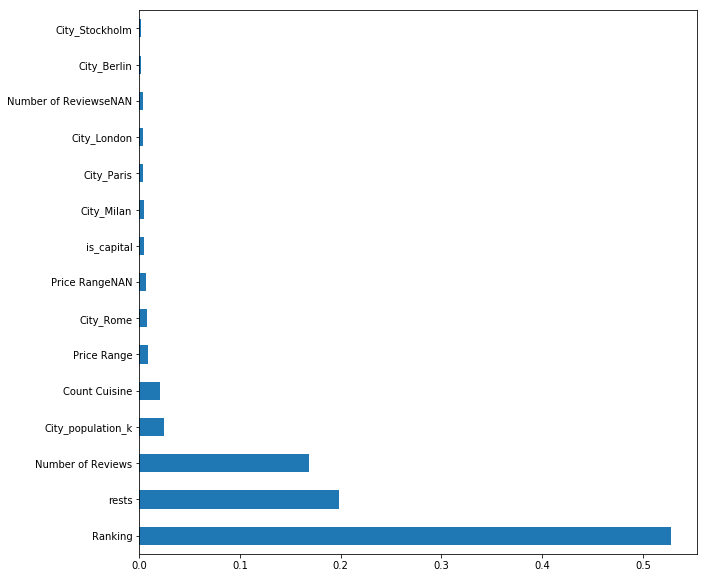

In [58]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [59]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Price RangeNAN,Number of ReviewseNAN,Cuisine StyleNAN,is_capital,rests,Сount Сuisine,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
1059,4584.0,2.0,467.0,0.0,0,0,0,1,7193,6,...,0,0,0,0,0,0,0,0,0,0
6575,1545.0,2.0,99.0,0.0,0,0,0,1,6108,3,...,0,0,1,0,0,0,0,0,0,0
9985,2429.0,2.0,48.0,0.0,0,0,0,0,2694,1,...,0,0,0,0,0,0,0,0,0,0
9551,1205.0,1.0,13.0,0.0,0,0,0,1,1647,2,...,0,0,0,0,0,0,0,0,0,0
3824,1031.0,2.0,0.0,0.0,1,1,0,1,776,2,...,0,0,0,0,0,0,0,0,0,0
2243,2576.0,2.0,14.0,0.0,0,0,0,0,1145,5,...,0,0,0,0,0,0,0,0,0,0
6667,18.0,2.0,262.0,0.0,0,0,0,1,263,6,...,0,0,0,0,0,0,0,0,0,0
5693,693.0,2.0,205.0,0.0,0,0,0,1,1443,7,...,0,0,0,0,0,0,1,0,0,0
1732,2015.0,2.0,19.0,0.0,1,0,0,1,2705,1,...,0,0,0,0,0,0,0,0,0,0
4357,1378.0,2.0,187.0,0.0,0,0,0,1,6108,3,...,0,0,1,0,0,0,0,0,0,0


In [60]:
test_data = test_data.drop(['Rating'], axis=1)

In [61]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [62]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [63]:
predict_submission

array([3.005, 4.225, 4.525, ..., 3.015, 4.5  , 4.255])

In [64]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.005
1,id_1,4.225
2,id_2,4.525
3,id_3,4.230
4,id_4,4.455
5,id_5,4.590
6,id_6,2.275
7,id_7,2.445
8,id_8,4.140
9,id_9,4.735


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
